In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


In [18]:
import os
import cv2
import numpy as np

In [19]:
data_dir = "C:/Users/priya/Downloads/archive (1)/Disaster_Dataset"

In [20]:
image_exts = ['jpeg','jpg', 'bmp', 'png', 'svg']

In [21]:
def load_dataset(dataset_dir):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_dir))
    class_dict = {class_name: i for i, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                image = cv2.imread(image_path)  # Read image using OpenCV
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                image = cv2.resize(image, (224, 224))  # Resize image if needed
                images.append(image)
                labels.append(class_dict[class_name])

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

In [22]:
images, labels, class_names = load_dataset(data_dir)

In [23]:
# Print information about the dataset
print("Number of images:", len(images))
print("Number of labels:", len(labels))
print("Number of classes:", len(class_names))
print("Class names:", class_names)

Number of images: 4876
Number of labels: 4876
Number of classes: 12
Class names: ['drought', 'earthquake', 'human_damage', 'infrastructure', 'land_slide', 'non_damage_buildings_street', 'non_damage_human', 'non_damage_sea', 'non_damage_wildlife_forest', 'urban_fire', 'water_disaster', 'wild_fire']


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 4876 files belonging to 12 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [28]:
import numpy as np
from matplotlib import pyplot as plt

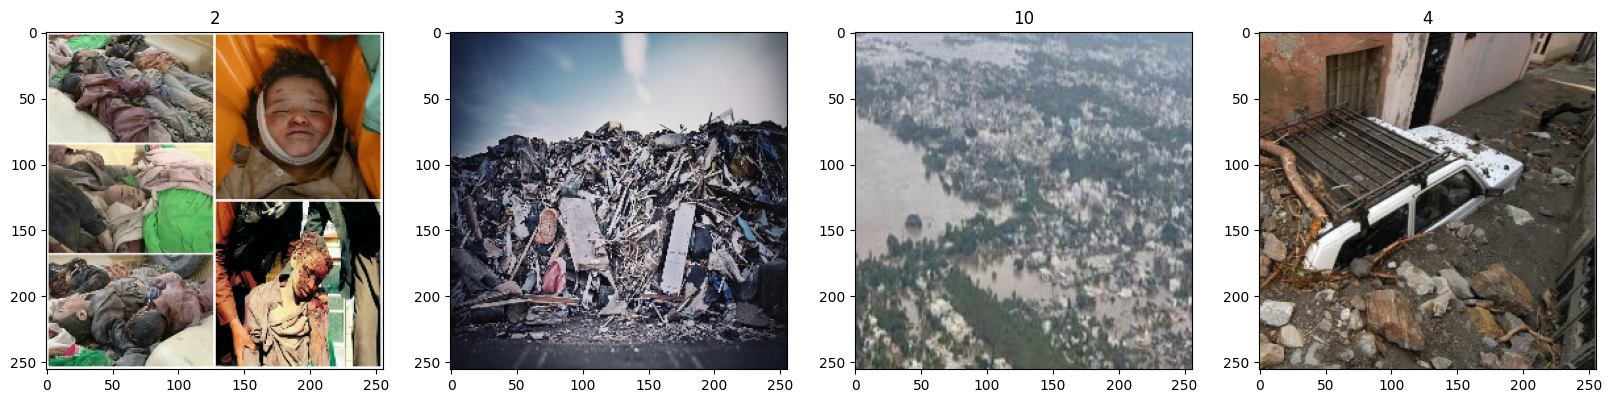

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:
train_size

107

In [16]:
import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [33]:
train_dataset = ImageFolder(root=data_dir, transform=None)

In [37]:
train_dataset = ImageFolder(root=data_dir, transform=transforms)

In [38]:
batch_size = 107
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [48]:
# Step 5: Iterate over the DataLoader
# DataLoader will provide batches of transformed images during training
# You can visualize the transformed images to verify the transformations
for images, labels in train_loader:
    # Visualize the transformed images (optional)
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        plt.subplot(4, 8, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).numpy())  # Convert tensor to numpy array
        plt.title('Class: {}'.format(train_dataset.classes[labels[i]]))
        plt.axis('off')
    plt.show()
    break  # Break the loop after one iteration for demonstration

TypeError: 'module' object is not callable